## 1. Paquetes/librerías a utilizar

In [1]:
import pandas as pd
import numpy as np
import glob
import os
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import re

## 2. Variables constantes

In [2]:
COLORES_CORPORATIVOS = ['#0072CE','#E31C79','#00968F','#D9C756','#FE5000','#B1B3B3']
COLORES = ['#2709d6','#f36a2c','#09d267']

HORAS_DIURNAS = ['H07','H08','H09','H10','H11','H12','H13','H14','H15','H16','H17','H18','H19','H20','H21','H22','H23','HoraPunta']

## 3. Carga de los datasets

In [3]:
oferta = pd.read_pickle('./datos/output/oferta.pkl')
meses_oferta = pd.read_pickle('./datos/output/meses_oferta.pkl')

In [4]:
meses_oferta['fechaCorta'] = meses_oferta[['year','month']].apply(lambda x: pd.to_datetime(f"{x[0]}/{x[1]}/01",format='%Y/%m/%d').strftime('%B.%Y'),axis=1)
meses_oferta

,CLinea,Elinea,Denominacion,year,month,IdFranja,MediaCochesMes,MediaCochesMes_Laborables,fechaCorta
18,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2019,1,H06,3.840000,4.000000,January.2019
0,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2019,1,H07,5.580645,6.857143,January.2019
1,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2019,1,H08,6.580645,7.857143,January.2019
2,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2019,1,H09,7.387097,8.857143,January.2019
3,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2019,1,H10,8.903226,10.857143,January.2019
...,...,...,...,...,...,...,...,...,...
22601,786,SE,PRINCIPE DE VERGARA - CALLAO,2019,5,H23,4.266667,5.000000,May.2019
638862,786,SE,PRINCIPE DE VERGARA - CALLAO,2019,5,HoraPunta,7.000000,7.000000,May.2019
22602,786,SE,PRINCIPE DE VERGARA - CALLAO,2019,5,M00,3.633333,4.000000,May.2019
22603,786,SE,PRINCIPE DE VERGARA - CALLAO,2019,5,M01,3.000000,3.000000,May.2019


## 4. Gráficos

In [6]:
def graficar(dataset:pd.DataFrame,size:tuple,num_linea:int,franja:str,valores:str='MediaCochesMes',guardar:bool=False):
    '''
    Funcion que genera un gráfico de lineas para los meses de 2019, 2020 y 2021 en la franja hora que se espcifica.
    Parameters
    ----------
    dataset   : DataFrame. Datos generales sobre las líneas o línea.
    num:linea : int. Número de la línea que se quiere consultar.
    franja    : str. Intervalo horario que se quiere consultar.
    valores   : str. Nombre de la medida que se quiere consultar.
    guardar   : bool. Opción para exportar y guardar la imagen. `False` por defecto   
    '''
    fig, axes = plt.subplots(figsize=size,dpi=100)
    axes.spines.right.set_visible(False)
    axes.spines.top.set_visible(False)


    # Filtro por linea y franja
    listado_franjas = dataset.loc[dataset['CLinea']==num_linea,'IdFranja'].unique()

    dataset = dataset[(dataset['CLinea']==num_linea)&(dataset['IdFranja']==franja)]
    dataset = dataset.dropna(subset=[valores]).drop_duplicates(subset=['year','month']).reset_index(drop=True)
    
    if len(dataset)==0:
        raise Exception(f"Las franjas horarias de la linea {num_linea} son: {listado_franjas}") 
        
    lineaPublico = str(dataset.loc[0,"Elinea"])
    cartel_linea = str(dataset.loc[0,"Denominacion"])

    # Visualizo los datos (media) y fechas
    for idx_color,fecha in enumerate(dataset['year'].unique()):
        axes.plot(dataset.loc[dataset['year'] == fecha,'fechaCorta'],dataset.loc[dataset['year'] == fecha, valores],'-o',label='Franja: '+ franja +'\nAño: '+str(fecha),color=COLORES_CORPORATIVOS[idx_color])


    # Configuraciones visuales
    axes.set_xticks(range(0,len(dataset['fechaCorta'])))
    axes.set_xticklabels(dataset['fechaCorta'], rotation = 45, ha="right")
    
    # axes.set_yticks(range(0,int(dataset[valores].max()+3)))
    axes.set_ylim([0,dataset[valores].max()+3])

    xTicks = axes.get_xticklabels()
    indices_enero = [i for i, fecha in enumerate(dataset['month']) if fecha==1]
            

    for indiceEnero in indices_enero:
        xTicks[indiceEnero].set_weight('bold')
    
    # Título y nombre ejes
    axes.set_xlabel('Fecha')
    axes.set_ylabel('# Autobuses')
    axes.set_title(label=f'Evolución núm. autobuses ({valores})\nLÍNEA {lineaPublico}: {cartel_linea}',pad=20)

    axes.grid(linestyle='--', linewidth=1, axis='both')

    leg = axes.legend(bbox_to_anchor=(1.025, 1), loc=2, borderaxespad=0)


    # plt.legend(loc="lower right") # Esto puede deshabilitar quitando la línea
    if guardar:
        plt.savefig(fname=f'images/LÍNEA_{num_linea}_{franja}_{cartel_linea}.jpg',format='jpg', bbox_inches='tight', dpi=200)


    fig.set_facecolor('white')

    plt.show()

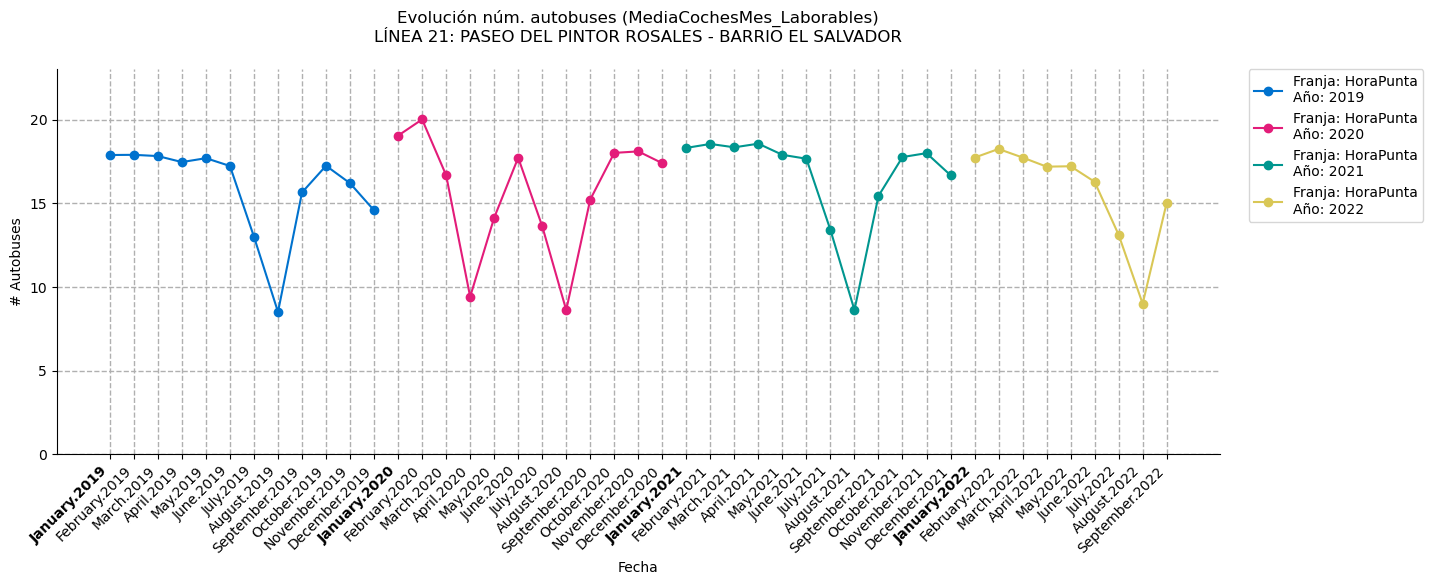

In [69]:
graficar(size=(15,5),dataset=meses_oferta,num_linea=21,franja='HoraPunta',valores='MediaCochesMes_Laborables')

In [8]:
# Durante la franja horaria de H08 hubo 1834 autobuses el día 24 de mayo de 2021.
oferta[(oferta['IdFranja']=='H08') & (oferta['FServicio']==pd.to_datetime('24/05/2021',dayfirst=True))]['Coches'].sum()

1834.0

In [8]:
# coches_dia: Suma de autobuses durante el día de FServicio de forma global en las líneas para cada franja horaria.

# media_mes_franja: Número medio de autobuses al mes de forma global en las líneas por franja horaria.

# coches_mes_franjalinea: Suma de autobuses al mes-año por línea y franja horaria.

In [9]:
oferta['coches_dia'] = oferta.groupby(by=['FServicio','IdFranja'])['Coches'].transform('sum')

# La media_mes_franja: no hace distinción entre sí es un día laborable o festivo.
oferta['media_mes_franja'] = oferta.groupby(by=['year','month','IdFranja'])['coches_dia'].transform('mean')

# No se si [coches_mes_franjalinea] aporta algo de valor
oferta['coches_mes_franjalinea'] = oferta.groupby(by=['year','month','CLinea','IdFranja'])[['Coches']].transform('sum')

In [21]:
oferta.loc[(oferta['IdFranja'].isin(HORAS_DIURNAS) & (oferta['TipoDiaMo']=='LA')),['IdFranja','FServicio','coches_dia','media_mes_franja','TipoDiaMo']].drop_duplicates(subset=['FServicio','IdFranja']).sort_values(by=['coches_dia'],ascending=[False])

,IdFranja,FServicio,coches_dia,media_mes_franja,TipoDiaMo
4082197,H09,2022-03-01,1894.0,1602.051048,LA
4082235,H09,2022-03-03,1890.0,1602.051048,LA
4082196,H08,2022-03-01,1890.0,1564.250389,LA
4082329,H09,2022-03-08,1888.0,1602.051048,LA
4082254,H09,2022-03-04,1888.0,1602.051048,LA
...,...,...,...,...,...
3188515,H20,2021-01-11,2.0,1190.166341,LA
3188514,H19,2021-01-11,2.0,1231.073526,LA
3188513,H18,2021-01-11,2.0,1233.858185,LA
3188512,H17,2021-01-11,2.0,1230.648445,LA


In [22]:
tmp = oferta.loc[(oferta['IdFranja'].isin(['H07','H08','H09'])&(oferta['TipoDiaMo']=='LA')),['FServicio','IdFranja','month','year','coches_dia','media_mes_franja']].copy()
# 'CLinea','Elinea','Denominacion',

In [26]:
tmp['coches_dia'] = tmp.groupby(by=['FServicio']).coches_dia.transform('mean')
tmp['media_mes_franja'] = tmp.groupby(by=['month','year']).coches_dia.transform('mean')
tmp = tmp.assign(IdFranja='HoraPunta',TipoDiaMo='LA').drop_duplicates(subset=['FServicio','IdFranja'])
tmp.sort_values(by=['coches_dia'],ascending=[False])

,FServicio,IdFranja,month,year,coches_dia,media_mes_franja,TipoDiaMo
4082195,2022-03-01,HoraPunta,3,2022,1816.492091,1793.382364,LA
4082233,2022-03-03,HoraPunta,3,2022,1813.808436,1793.382364,LA
4082327,2022-03-08,HoraPunta,3,2022,1813.451670,1793.382364,LA
4082346,2022-03-09,HoraPunta,3,2022,1811.757469,1793.382364,LA
4082214,2022-03-02,HoraPunta,3,2022,1811.135325,1793.382364,LA
...,...,...,...,...,...,...,...
642554,2019-12-13,HoraPunta,12,2019,465.016293,1459.397463,LA
2582129,2021-01-14,HoraPunta,1,2021,458.666667,1330.668291,LA
2582109,2021-01-13,HoraPunta,1,2021,419.666667,1330.668291,LA
2611733,2021-01-12,HoraPunta,1,2021,276.927711,1330.668291,LA


In [68]:
meses_oferta[meses_oferta['MediaCochesMes_Laborables'].isna()]

,CLinea,Elinea,Denominacion,year,month,IdFranja,MediaCochesMes,MediaCochesMes_Laborables,fechaCorta
246,3,3,PUERTA DE TOLEDO - PLAZA DE SAN AMARO,2019,1,M00,1.0,NaN,January.2019
284,3,3,PUERTA DE TOLEDO - PLAZA DE SAN AMARO,2019,3,M00,1.0,NaN,March.2019
46030,8,8,PLAZA DE LEGAZPI - VALDEBERNARDO,2020,1,M00,1.0,NaN,January.2020
46050,8,8,PLAZA DE LEGAZPI - VALDEBERNARDO,2020,2,M00,1.0,NaN,February.2020
113814,8,8,PLAZA DE LEGAZPI - VALDEBERNARDO,2021,7,M00,1.0,NaN,July.2021
...,...,...,...,...,...,...,...,...,...
136205,760,SE,PRINCIPE PIO - MADRID ARENA,2021,12,H13,2.0,NaN,December.2021
45042,765,SE,PLAZA DE CASTILLA - FERIA DE MADRID,2019,10,H04,4.0,NaN,October.2019
89976,766,SE,ATOCHA - POLIGONO INDUSTRIAL DE VALLECAS,2020,7,H23,1.0,NaN,July.2020
112977,766,SE,ATOCHA - POLIGONO INDUSTRIAL DE VALLECAS,2021,4,H08,1.0,NaN,April.2021


In [81]:
meses_oferta['MediaCoches_1dia_laborable'] = meses_oferta.groupby(by=['year','month','IdFranja'],as_index=False)['MediaCochesMes_Laborables'].transform('sum')
meses_oferta[meses_oferta['IdFranja'].isin(HORAS_DIURNAS)].sort_values(by=['CLinea','MediaCoches_1dia_laborable',],ascending=[True,False]).head(10)

,CLinea,Elinea,Denominacion,year,month,IdFranja,MediaCochesMes,MediaCochesMes_Laborables,fechaCorta,MediaCoches_1dia_laborable
140185,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2022,2,H09,8.321429,9.900000,February.2022,1881.968182
140184,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2022,2,H08,7.500000,8.950000,February.2022,1879.468182
144104,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2022,3,H09,8.516129,9.956522,March.2022,1879.222222
144103,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2022,3,H08,7.677419,9.000000,March.2022,1876.048309
90056,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2021,4,H09,8.000000,9.850000,April.2021,1860.513158
90055,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2021,4,H08,7.233333,8.900000,April.2021,1858.863158
90019,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2021,2,H09,8.357143,9.900000,February.2021,1855.450000
90018,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2021,2,H08,7.535714,8.950000,February.2021,1853.300000
151985,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2022,5,H09,7.774194,9.700000,May.2022,1848.300000
151984,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2022,5,H08,7.193548,8.950000,May.2022,1848.150000


In [37]:
oferta_dia = pd.concat([oferta.loc[(oferta['IdFranja'].isin(HORAS_DIURNAS)),['FServicio','IdFranja','coches_dia','media_mes_franja','TipoDiaMo','month','year']].drop_duplicates(subset=['FServicio','IdFranja']),tmp]).sort_values(by=['FServicio','IdFranja']).astype({'year':'int16','month':'int16'})

In [40]:
oferta_dia[oferta_dia['IdFranja']=='HoraPunta'].sort_values(by=['media_mes_franja'],ascending=False)

,FServicio,IdFranja,coches_dia,media_mes_franja,TipoDiaMo,month,year
4082252,2022-03-04,HoraPunta,1810.138840,1793.382364,LA,3,2022
4082761,2022-03-31,HoraPunta,1793.557319,1793.382364,LA,3,2022
4082742,2022-03-30,HoraPunta,1789.569665,1793.382364,LA,3,2022
4082723,2022-03-29,HoraPunta,1796.587302,1793.382364,LA,3,2022
4082704,2022-03-28,HoraPunta,1793.583774,1793.382364,LA,3,2022
...,...,...,...,...,...,...,...
1922960,2020-08-05,HoraPunta,965.527307,956.106890,LA,8,2020
1922941,2020-08-04,HoraPunta,965.525424,956.106890,LA,8,2020
1922922,2020-08-03,HoraPunta,965.527307,956.106890,LA,8,2020
1923447,2020-08-31,HoraPunta,960.853107,956.106890,LA,8,2020


In [15]:
oferta_ymf = oferta_dia.loc[oferta_dia['IdFranja'].isin(HORAS_DIURNAS),['IdFranja','month','year','media_mes_franja']].set_index(['year','month','IdFranja']).drop_duplicates().copy()
oferta_ymf = oferta_ymf.reset_index()

In [16]:
oferta_ymf

,year,month,IdFranja,media_mes_franja
0,2019,1,H07,1222.848711
1,2019,1,H08,1401.016782
2,2019,1,H09,1441.963541
3,2019,1,H10,1344.225422
4,2019,1,H11,1233.341709
...,...,...,...,...
805,2022,9,H20,1257.903759
806,2022,9,H21,1080.940018
807,2022,9,H22,895.314689
808,2022,9,H23,689.404900


In [17]:
oferta_year = oferta_ymf.loc[(oferta_ymf['IdFranja']=='HoraPunta') & (oferta_ymf['year'].isin([2019,2021,2022])),['IdFranja','month','year','media_mes_franja']].drop_duplicates().set_index(['year','month'])[['media_mes_franja']].unstack().T.reset_index(drop=True).copy()

oferta_year['month'] = range(1,13)
oferta_year = oferta_year.set_index('month').fillna(0)
oferta_year

year,2019,2021,2022
month,,,
1,1694.336940,1627.555260,1722.804915
2,1717.915886,1773.879478,1784.762945
3,1714.360374,1763.720993,1793.414591
4,1695.989601,1781.582691,1739.211540
5,1725.667714,1767.424001,1777.494874
6,1707.481273,1691.220663,1690.196162
7,1390.767023,1422.257014,1419.385786
8,981.961401,993.851234,1004.593457
9,1591.561158,1568.887469,1605.406553


In [18]:
oferta_year['2022-2021'] = (oferta_year[2022] - oferta_year[2021]).astype(int)
oferta_year['2022-2019'] = (oferta_year[2022] - oferta_year[2019]).astype(int)
oferta_year['2021-2019'] = (oferta_year[2021] - oferta_year[2019]).astype(int)


meses = pd.DataFrame(data={'month':pd.date_range(end='2022-01-01', freq='M', periods=12)})
meses['month_name'] = meses['month'].dt.strftime("%b")

oferta_year['color_22_21'] = [COLORES_CORPORATIVOS[1] if diff_value <0  else COLORES_CORPORATIVOS[2] for diff_value in oferta_year['2022-2021']]
oferta_year['color_22_19'] = [COLORES_CORPORATIVOS[1] if diff_value <0  else COLORES_CORPORATIVOS[2] for diff_value in oferta_year['2022-2019']]
oferta_year['color_21_19'] = [COLORES_CORPORATIVOS[1] if diff_value <0  else COLORES_CORPORATIVOS[2] for diff_value in oferta_year['2021-2019']]

oferta_year

year,2019,2021,2022,2022-2021,2022-2019,2021-2019,color_22_21,color_22_19,color_21_19
month,,,,,,,,,
1,1694.336940,1627.555260,1722.804915,95,28,-66,#00968F,#00968F,#E31C79
2,1717.915886,1773.879478,1784.762945,10,66,55,#00968F,#00968F,#00968F
3,1714.360374,1763.720993,1793.414591,29,79,49,#00968F,#00968F,#00968F
4,1695.989601,1781.582691,1739.211540,-42,43,85,#E31C79,#00968F,#00968F
5,1725.667714,1767.424001,1777.494874,10,51,41,#00968F,#00968F,#00968F
6,1707.481273,1691.220663,1690.196162,-1,-17,-16,#E31C79,#E31C79,#E31C79
7,1390.767023,1422.257014,1419.385786,-2,28,31,#E31C79,#00968F,#00968F
8,981.961401,993.851234,1004.593457,10,22,11,#00968F,#00968F,#00968F
9,1591.561158,1568.887469,1605.406553,36,13,-22,#00968F,#00968F,#E31C79


In [19]:
from matplotlib.ticker import (AutoMinorLocator)

[]

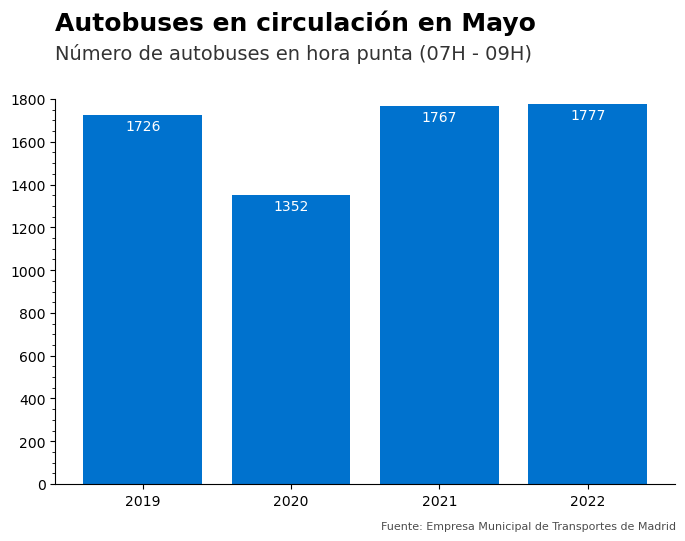

In [20]:
fig, ax = plt.subplots(figsize=(8, 5),dpi=100)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)


DATA = oferta_ymf.loc[(oferta_ymf['month']==5) & (oferta_ymf['IdFranja']=='HoraPunta'),['IdFranja','month','year','media_mes_franja']].drop_duplicates().set_index(['year'])['media_mes_franja']

bars = ax.bar(range(2019,2023),DATA,label=range(2019,2023),color=COLORES_CORPORATIVOS[0])

ax.set_xticks(range(2019,2023))
ax.set_yticks(range(0,1800,200),minor=True)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(0,1800)

ax.set_title('Autobuses en circulación en Mayo',loc='left',size=18,pad=50,weight='bold')
# Add in title and subtitle
ax.text(x=.125, y=0.96, 
        s="Número de autobuses en hora punta (07H - 09H)", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=14, 
        alpha=.8)
# Set source text
ax.text(x=.532, y=0.02, 
        s="""Fuente: Empresa Municipal de Transportes de Madrid""", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=8, 
        alpha=.7)
ax.bar_label(bars,padding=-13,color='white',fmt='%.0f')
ax.plot()
# fig.savefig(fname='images/autobueses_circulación_mayo.png', bbox_inches='tight')

[]

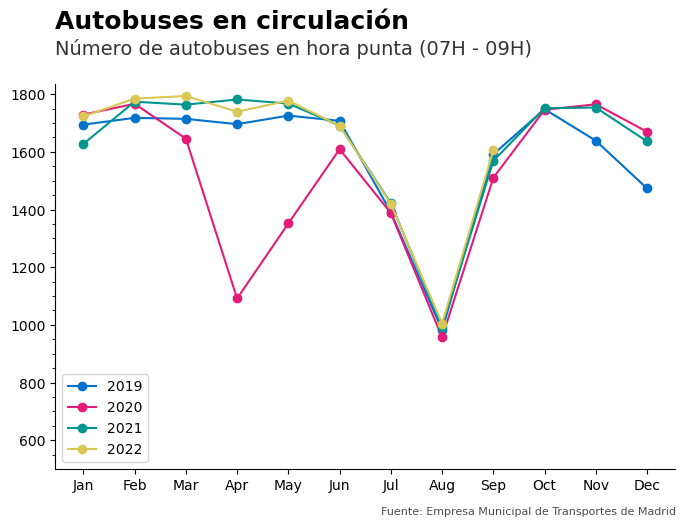

In [21]:
fig, ax = plt.subplots(figsize=(8, 5),dpi=100)
for i_color,year in enumerate(range(2019,2023)):
    ax.plot(oferta_ymf.loc[(oferta_ymf['IdFranja']=='HoraPunta')&(oferta_ymf['year']==year),['IdFranja','month','year','media_mes_franja']].drop_duplicates().set_index(['month'])[['media_mes_franja']],'-o',label=str(year),color=COLORES_CORPORATIVOS[i_color])

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.set_ylim(500)
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.set_xticks(range(1,13))
ax.set_xticklabels(pd.date_range('2021-01-01','2021-12-31',freq='MS').strftime("%b").tolist())

# Add in title and subtitle
ax.set_title('Autobuses en circulación',loc='left',size=18,pad=40,weight='bold')
ax.text(x=.125, y=.94, 
        s="Número de autobuses en hora punta (07H - 09H)", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=14, 
        alpha=.8)
# Set source text
ax.text(x=.532, y=0.02, 
        s="""Fuente: Empresa Municipal de Transportes de Madrid""", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=8, 
        alpha=.7)

ax.legend()
# fig.savefig(fname='images/autobueses_circulación.png',bbox_inches='tight')
ax.plot()

In [112]:
(int(str(abs(oferta_year['2021-2019'].min()))[0])+1)*(10**(len(str(abs(oferta_year['2021-2019'].min())))-1))
(int(str(oferta_year['2021-2019'].max())[0])+1)*(10**(len(str(abs(oferta_year['2021-2019'].max())))-1))

200

In [120]:
ayuda_tmp = str(abs(52))
primer_digito = int(ayuda_tmp[0])
longitud = len(str(int(abs(52))))
primer_digito*((10**(longitud-1)))

50

[]

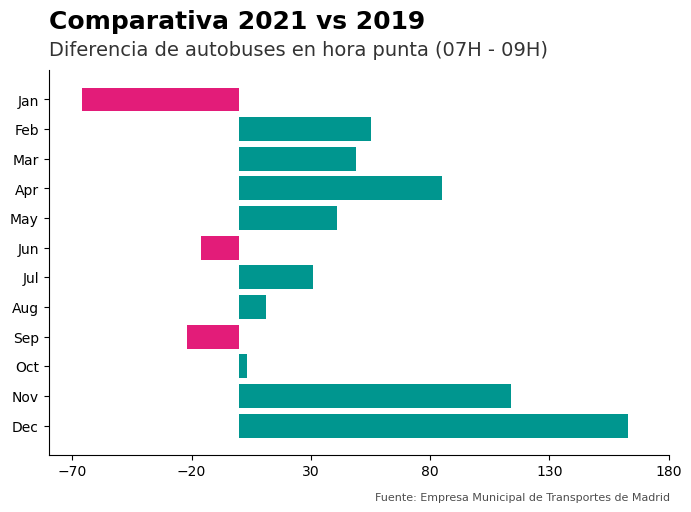

In [121]:
fig, ax = plt.subplots(figsize=(8, 5))

# Create horizontal bars
ax.barh(y=oferta_year.index.values, width=oferta_year[::-1]['2021-2019'],color=oferta_year[::-1]['color_21_19'])

if(oferta_year['2021-2019'].min()<0):
        min_rango = -abs(int(str(abs(oferta_year['2021-2019'].min()))[0])+1)*(10**(len(str(abs(oferta_year['2021-2019'].min())))-1))
else:
        min_rango = 0

max_rango = (int(str(oferta_year['2021-2019'].max())[0])+1)*(10**(len(str(abs(oferta_year['2021-2019'].max())))-1))

rango_x = range(min_rango,max_rango,50)
ax.set_xlim(min_rango-10)
ax.set_xticks(rango_x)

ax.set_yticks(range(1,13))
ax.set_yticklabels((meses.sort_values(by=['month'],ascending=False))['month_name'])

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Add in title and subtitle
ax.set_title('Comparativa 2021 vs 2019',loc='left',size=18,pad=30,weight='bold')
ax.text(x=.125, y=.91, 
        s="Diferencia de autobuses en hora punta (07H - 09H)", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=14, 
        alpha=.8)
# Set source text
ax.text(x=.533, y=0.02, 
        s="""Fuente: Empresa Municipal de Transportes de Madrid""", 
        transform=fig.transFigure,
        ha='left', 
        fontsize=8, 
        alpha=.7)

ax.plot()
# fig.savefig(fname='images/autobueses_circulación_diff_2019_2021.png', bbox_inches='tight')

In [74]:
oferta.loc[(oferta['FServicio'].isin(pd.date_range(start='2021/01/09',end='2021/01/13'))) & (oferta['IdFranja'].isin(['H16','H17','H18','H19','H20','H21','H22','H23','H24'])),['CLinea','Elinea','Denominacion','FServicio','IdFranja','DiaSemana','TipoDiaMo','Coches','coches_dia','media_mes_franja','coches_mes_franjalinea']]['CLinea'].unique()

array([  4,  14,  19,  21,  27,  31,  34,  38,  45,  56,  68,  69,  81,
        85,  86, 121, 124, 125, 135, 138, 143, 146, 147, 156, 165, 166,
       210, 401, 402, 403, 404, 453, 481, 709], dtype=int64)

In [94]:
oferta.loc[(oferta['CLinea']!=709) & (oferta['IdFranja'].isin(HORAS_DIURNAS))&(oferta['FServicio'].isin(pd.date_range(start='2021/01/12',end='2021/01/12'))),['CLinea','Elinea','Denominacion','FServicio','IdFranja','DiaSemana','TipoDiaMo','Coches','coches_dia','media_mes_franja','coches_mes_franjalinea']].sort_values(by=['CLinea','IdFranja'],ascending=[False,True]).head(25)

,CLinea,Elinea,Denominacion,FServicio,IdFranja,DiaSemana,TipoDiaMo,Coches,coches_dia,media_mes_franja,coches_mes_franjalinea
3144197,481,H1,SIERRA DE GUADALUPE - HOSPITAL INFANTA LEONOR,2021-01-12,H07,M,LA,2.0,227.0,1122.046299,63.0
3144198,481,H1,SIERRA DE GUADALUPE - HOSPITAL INFANTA LEONOR,2021-01-12,H08,M,LA,3.0,286.0,1281.082870,81.0
3144199,481,H1,SIERRA DE GUADALUPE - HOSPITAL INFANTA LEONOR,2021-01-12,H09,M,LA,4.0,316.0,1332.157414,82.0
3144200,481,H1,SIERRA DE GUADALUPE - HOSPITAL INFANTA LEONOR,2021-01-12,H10,M,LA,4.0,307.0,1232.054369,82.0
3144201,481,H1,SIERRA DE GUADALUPE - HOSPITAL INFANTA LEONOR,2021-01-12,H11,M,LA,4.0,286.0,1156.546117,81.0
3144202,481,H1,SIERRA DE GUADALUPE - HOSPITAL INFANTA LEONOR,2021-01-12,H12,M,LA,4.0,287.0,1160.962136,81.0
3144203,481,H1,SIERRA DE GUADALUPE - HOSPITAL INFANTA LEONOR,2021-01-12,H13,M,LA,4.0,304.0,1213.965291,81.0
3144204,481,H1,SIERRA DE GUADALUPE - HOSPITAL INFANTA LEONOR,2021-01-12,H14,M,LA,4.0,306.0,1214.815534,81.0
3144205,481,H1,SIERRA DE GUADALUPE - HOSPITAL INFANTA LEONOR,2021-01-12,H15,M,LA,2.0,302.0,1192.131892,46.0
3144206,481,H1,SIERRA DE GUADALUPE - HOSPITAL INFANTA LEONOR,2021-01-12,H16,M,LA,2.0,302.0,1183.576774,46.0


In [33]:
LINEAS_RITA = ['27', '14', '19', '40', '70', '74', '175', '178', 'T61']

In [38]:
oferta[(oferta['CLinea']==25) & (oferta['month']==5) & (oferta['year']==2019)].sort_values(by=['IdFranja'])

,CLinea,Elinea,Denominacion,FServicio,IdFranja,Intervalo,Coches,year,month,month_name,week,TipoDiaMo,TemporadaTG,DiaSemana,day_name,coches_dia,media_mes_franja,coches_mes_franjalinea
81760,25,25,PLAZA DE ESPAÑA - CASA DE CAMPO,2019-05-09,H05,050000 - 055959,1.0,2019,5,May,19,LA,IV,J,Thursday,236.0,219.384679,23.0
81837,25,25,PLAZA DE ESPAÑA - CASA DE CAMPO,2019-05-13,H05,050000 - 055959,1.0,2019,5,May,20,LA,IV,L,Monday,234.0,219.384679,23.0
82033,25,25,PLAZA DE ESPAÑA - CASA DE CAMPO,2019-05-23,H05,050000 - 055959,1.0,2019,5,May,21,LA,IV,J,Thursday,233.0,219.384679,23.0
81973,25,25,PLAZA DE ESPAÑA - CASA DE CAMPO,2019-05-20,H05,050000 - 055959,1.0,2019,5,May,21,LA,IV,L,Monday,233.0,219.384679,23.0
81895,25,25,PLAZA DE ESPAÑA - CASA DE CAMPO,2019-05-16,H05,050000 - 055959,1.0,2019,5,May,20,LA,IV,J,Thursday,233.0,219.384679,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81836,25,25,PLAZA DE ESPAÑA - CASA DE CAMPO,2019-05-12,M00,000000 - 005959,1.0,2019,5,May,19,FE,IV,D,Sunday,198.0,208.678271,31.0
81856,25,25,PLAZA DE ESPAÑA - CASA DE CAMPO,2019-05-13,M00,000000 - 005959,1.0,2019,5,May,20,LA,IV,L,Monday,203.0,208.678271,31.0
82072,25,25,PLAZA DE ESPAÑA - CASA DE CAMPO,2019-05-24,M00,000000 - 005959,1.0,2019,5,May,21,LA,IV,V,Friday,218.0,208.678271,31.0
82190,25,25,PLAZA DE ESPAÑA - CASA DE CAMPO,2019-05-30,M00,000000 - 005959,1.0,2019,5,May,22,LA,IV,J,Thursday,207.0,208.678271,31.0


In [44]:
oferta.loc[(oferta['Elinea']==LINEAS_RITA[0])&(oferta['IdFranja']=='H08'),['year','month','Elinea','IdFranja','coches_mes_franjalinea']]

,year,month,Elinea,IdFranja,coches_mes_franjalinea
86029,2019,1,27,H08,600.0
86048,2019,1,27,H08,600.0
86067,2019,1,27,H08,600.0
86086,2019,1,27,H08,600.0
86105,2019,1,27,H08,600.0
...,...,...,...,...,...
4773247,2022,9,27,H08,548.0
4773267,2022,9,27,H08,548.0
4773287,2022,9,27,H08,548.0
4773307,2022,9,27,H08,548.0


In [41]:
df_lineas = pd.DataFrame()
for linea in LINEAS_RITA:
    tmp = oferta.loc[(oferta['Elinea']==linea)&(oferta['IdFranja']=='HoraPunta'),['year','month','Elinea','IdFranja','coches_mes_franjalinea']].drop_duplicates().set_index(['year','month'])[['coches_mes_franjalinea']].unstack().T.reset_index(drop=True).copy()
    tmp['Elinea'] = linea
    df_lineas = pd.concat([df_lineas, tmp])

In [42]:
df_lineas

year,Elinea


In [330]:
df_lineas

year,2019,2020,2021,Elinea
0,529.333333,541.333333,434.666667,27
1,513.333333,518.000000,503.000000,27
2,539.333333,547.333333,547.333333,27
3,514.666667,269.000000,503.000000,27
4,520.333333,354.333333,501.666667,27
...,...,...,...,...
7,142.000000,143.000000,150.000000,T61
8,208.000000,192.000000,218.000000,T61
9,260.000000,187.000000,191.333333,T61
10,212.333333,201.666667,195.666667,T61


<AxesSubplot:>

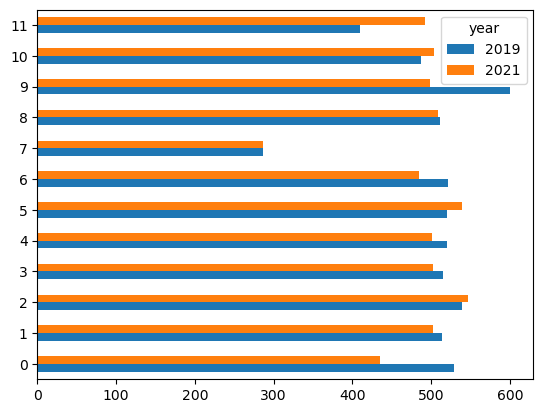

In [337]:
df_lineas[df_lineas['Elinea']=='27'][[2019,2021]].plot(kind='barh')

# Líneas con mayor afluencia de pasajeros
Según este tweet de [@EMTmadrid](https://twitter.com/emtmadrid/status/956855958369701889?lang=es) las líneas con mayor demanda en 2017 son: L34, L27, L70, C1, C2, L31, L28, L35 y L17.

La demanda de estas líneas supone un 26.5% del total, equivalente 113 millones de pasajeros en dicho año.

In [12]:
numero_viajeros = pd.read_csv('datos/output/numero_viajeros.csv')
aclaraciones = pd.read_csv('datos/output/aclaraciones_ocupacion_lineas.csv')

In [13]:
ranking = numero_viajeros.iloc[:,:3].copy()

In [14]:
for year in range(2014,int(numero_viajeros.columns[-1])):
    rank = numero_viajeros.loc[:,['Código',str(year)]].sort_values(by=[str(year)], ascending=False)
    rank[str(year)] = rank.reset_index().index+1
    # numero_viajeros[str(year)].sort_values(ascending=False).reset_index().rename(columns={'index':'Código'})
    ranking = ranking.merge(rank)

In [15]:
# Debería cambiar este tipo de tabla por una que fueran las filas los años y las columnas el top10. De esa forma conseguiría mostrar siempre las 10 líneas para cada año y no como se muestra ahora que son las 10 líneas más usadas en el último año (2021).

ranking.sort_values(by='2021').iloc[0:10,:]

,Código,Etiqueta,Denominación,2014,2015,2016,2017,2018,2019,2020,2021
32,34,34,PLAZA DE CIBELES - LAS AGUILAS,2,2,2,1,1,1,1,1
68,70,70,PLAZA DE CASTILLA - ALSACIA,5,5,5,3,3,3,2,2
25,27,27,GLORIETA DE EMBAJADORES - PLAZA DE CASTILLA,1,1,1,2,2,2,3,3
67,69,C2,CIRCULAR 2 -,4,4,4,5,5,5,6,4
66,68,C1,CIRCULAR 1 -,3,3,3,4,4,4,5,5
29,31,31,PLAZA MAYOR - ALUCHE,6,6,6,6,7,8,7,6
26,28,28,PUERTA DE ALCALA - BARRIO DE CANILLEJAS,8,8,9,8,8,7,8,7
19,21,21,PASEO DEL PINTOR ROSALES - BARRIO EL SALVADOR,7,7,7,7,6,6,4,8
33,35,35,PLAZA MAYOR - CARABANCHEL ALTO,9,9,8,9,9,9,9,9
128,138,138,PLAZA DE CRISTO REY - COLONIA SAN IGNACIO DE L...,61,58,60,54,38,29,11,10


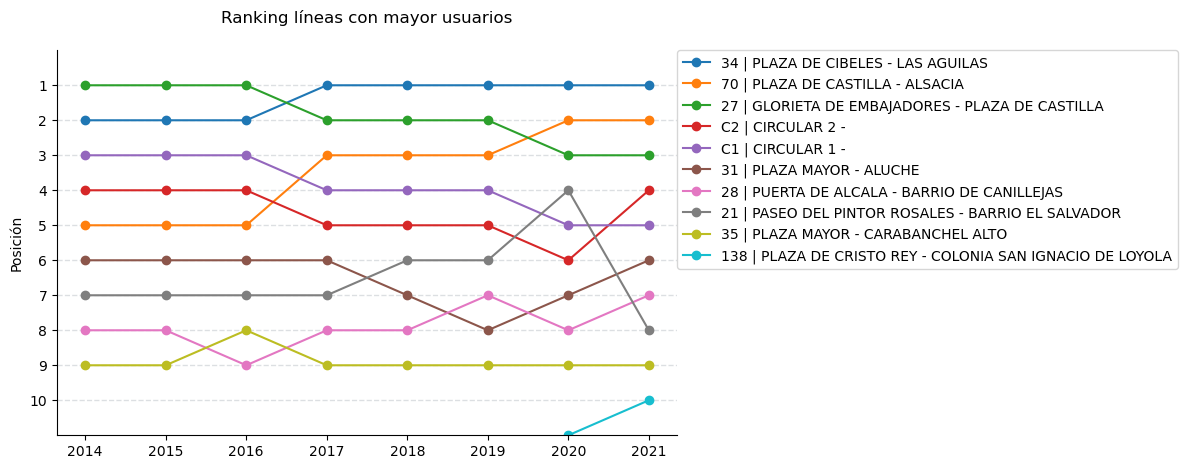

In [167]:
data = ranking.sort_values(by='2021').iloc[0:10,:].reset_index(drop=True)

fig, axes = plt.subplots(figsize=(8, 5),dpi=100)
axes.spines.right.set_visible(False)
axes.spines.top.set_visible(False)

# Visualizo los datos (avg_coches) y fechas

years = ranking.columns[3:]
axes.plot(years,data.iloc[:,3:].T.values,'-o',label=data['Etiqueta'] + ' | ' +data['Denominación'])

# # Título y nombre ejes
# axes.set_xlabel('Años')
axes.set_ylabel('Posición')
axes.set_title(label=f'Ranking líneas con mayor usuarios',pad=20)
   
axes.set_xticks(range(0,len(years)))
axes.set_xticklabels(years)
axes.set_ylim(0,11)
axes.set_yticks(range(1,11))
axes.invert_yaxis()

axes.grid(color="#172a3d", linestyle='--', linewidth=1, axis='y', alpha=0.15)
axes.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0,)
fig.set_facecolor('white')
plt.show()

## Aclaraciones

|    |   Año | Informacion                                                                                 |
|---:|------:|:--------------------------------------------------------------------------------------------|
|  0 |  2019 | (1)  El Servicio Especial 721 solo funciona los días de evento en el Estadio Metropolitano. |
|  1 |  2019 | (2)  El 1 de abril de 2019 el Servicio Especial 722 se transforma en la línea 166.          |
|  2 |  2020 | (1)  El Servicio Especial 721 solo funciona los días de evento en el Estadio Metropolitano. |
|  3 |  2020 | (2)  El 18 de febrero se crea la línea 361.                                                 |
|  4 |  2020 | (3)  El 3 de marzo de 2020 la línea 602 se prolonga y se transforma en la línea 362.        |
|  5 |  2020 | (4)  El 16 de marzo de 2020 el Servicio Especial 723 se transforma en la línea 159.         |
|  6 |  2020 | (5)  El Servicio Especial 710 funciona del 23 de marzo al 24 de mayo de 2020.               |
|  7 |  2020 | (6)  El 15 de septiembre se crea la línea 363.                                              |
|  8 |  2020 | (7)  El 7 de octubre se crea el Servicio Especial 712.                                      |
|  9 |  2021 | (1)  El Servicio Especial 721 solo funciona los días de evento en el Estadio Metropolitano. |
| 10 |  2021 | (2)  El 16 de febrero se crea la línea 167.                                                 |
| 11 |  2021 | (3)  El 2 de marzo se crea la línea 163.                                                    |
| 12 |  2021 | (4)  El 17 de marzo se crea la línea 405.                                                   |
| 13 |  2021 | (5)  El 1 de septiembre se crea el Servicio Especial 708.                                   |


## Servicios Especiales (SE) --> Habituales

Además, hay otras aclaraciones que no se contemplan como el cambio de `Servicio Especial` a  `Regular` de la línea con tramo `MAR DE CRISTAL - VALDEBEBAS`. Pero eso no siempre es así, en ocasiones 2 líneas pueden tener el mismo nombre pero realizar trayectos diferentes.

Este puede ser el caso de las líneas `22` y `79` que reciben en ambos caso la denominación de _`PLAZA DE LEGAZPI - VILLAVERDE ALTO`_

In [17]:
numero_viajeros['Denominación'].value_counts().to_frame()[numero_viajeros['Denominación'].value_counts().to_frame().rename(columns={'Denominación':'count'})['count']==2]

,Denominación
ALSACIA - HOSPITAL RAMON Y CAJAL,2
PLAZA DE CIBELES - PALOMERAS,2
PUERTA DE TOLEDO - ARGÜELLES,2
MAR DE CRISTAL - VALDEBEBAS,2
PLAZA DE LEGAZPI - VILLAVERDE ALTO,2
BARAJAS - HOSPITAL RAMON Y CAJAL,2
PLAZA MAYOR - VILLAVERDE CRUCE,2
MONCLOA - ARAVACA,2
PLAZA DE CASTILLA - BARRIO DE PEÑAGRANDE,2


In [19]:
numero_viajeros[numero_viajeros['Denominación']=="PLAZA DE LEGAZPI - VILLAVERDE ALTO"]

,Código,Etiqueta,Denominación,2014,2015,2016,2017,2018,2019,2020,2021,2022
20,22,22,PLAZA DE LEGAZPI - VILLAVERDE ALTO,1870951,1780063,1848495,1853754,2090211,2250369,1202753,1492295,746364
77,79,79,PLAZA DE LEGAZPI - VILLAVERDE ALTO,1034255,1085020,1148193,1162509,1205486,1226949,758516,958153,463169


In [20]:
numero_viajeros[numero_viajeros['Denominación']=="MAR DE CRISTAL - VALDEBEBAS"]

,Código,Etiqueta,Denominación,2014,2015,2016,2017,2018,2019,2020,2021,2022
155,171,171,MAR DE CRISTAL - VALDEBEBAS,0,0,484127,471277,595458,704949,478455,663449,324996
268,799,SE,MAR DE CRISTAL - VALDEBEBAS,92731,337471,0,0,0,0,0,0,0


In [95]:
columnas_calculo = dict()

for year in range(int(numero_viajeros.columns[3:].min()),int(numero_viajeros.columns[3:].max())+1,1):
    columnas_calculo[str(year)] = 'sum'

numero_viajeros.groupby(by=['Denominación']).agg({**columnas_calculo,**{'Denominación':'count'}}).rename(columns={'Denominación':'count'}).sort_values(by='count',ascending=False)


In [21]:
lineas_espciales = numero_viajeros[numero_viajeros['Código']>=700][['Código','Etiqueta','Denominación']].reset_index(drop=True)
lineas_habituales = numero_viajeros[numero_viajeros['Código']<700][['Código','Etiqueta','Denominación']].reset_index(drop=True)

In [38]:
print(f'Lineas habituales: {len(lineas_habituales["Denominación"])} / Líneas SE: {len(lineas_espciales["Denominación"])} / Diferencia: {len(set(lineas_habituales["Denominación"])-set(lineas_espciales["Denominación"]))}')

Lineas habituales: 217 / Líneas SE: 52 / Diferencia: 208


In [24]:
lineas_habituales.join(other=lineas_espciales.set_index('Denominación'),on=['Denominación'],rsuffix='_SE',how='inner')

,Código,Etiqueta,Denominación,Código_SE,Etiqueta_SE
151,165,165,ALSACIA - HOSPITAL RAMON Y CAJAL,720,SE
152,166,166,BARAJAS - HOSPITAL RAMON Y CAJAL,722,SE
155,171,171,MAR DE CRISTAL - VALDEBEBAS,799,SE


In [149]:
numero_viajeros['media'] = numero_viajeros.iloc[:,3:].apply(lambda x: x.mean(),axis=1)
numero_viajeros['media_sin_2022'] = numero_viajeros.iloc[:,3:11].apply(lambda x: x.mean(),axis=1)

numero_viajeros.sort_values(by='2021',ascending=False)

,Código,Etiqueta,Denominación,2014,2015,2016,2017,2018,2019,2020,2021,2022,media,media_sin_2022
32,34,34,PLAZA DE CIBELES - LAS AGUILAS,7840818,7984636,8363237,8575908,8496485,8986303,5167825,6650128,3432417,7.325556e+06,7758167.500
68,70,70,PLAZA DE CASTILLA - ALSACIA,7122258,7129357,7252981,7508617,7286532,7677360,4416674,5228237,2714421,6.303886e+06,6702752.000
25,27,27,GLORIETA DE EMBAJADORES - PLAZA DE CASTILLA,8902761,8767669,8916906,8269113,7750416,8230803,3970651,4795961,2428158,6.948255e+06,7450535.000
67,69,C2,CIRCULAR 2 -,7278401,7239262,7442740,7003394,6686799,6926192,3581783,4483508,2357121,5.932913e+06,6330259.875
66,68,C1,CIRCULAR 1 -,7478016,7333224,7483436,7161191,6832968,6989959,3605080,4434154,2359257,6.009170e+06,6414753.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,732,SE,PUERTA DE ARGANDA - SAINZ DE BARANDA,0,8268,0,0,331646,0,0,0,0,3.823997e+04,42489.250
107,117,117,ALUCHE - COLONIA SAN IGNACIO DE LOYOLA,1008768,1001468,979882,906343,1111297,832268,0,0,0,6.569968e+05,730003.250
243,737,SE,LEGAZPI - LAGUNA,0,0,0,0,0,0,0,0,28,2.800234e+00,0.000
244,739,SE,POZUELO - HOSPITAL ENFERMERA ISABEL ZENDAL,0,0,0,0,0,0,0,0,8076,8.076674e+02,0.000


In [ ]:
numero_viajeros[numero_viajeros['Etiqueta']=='SE']

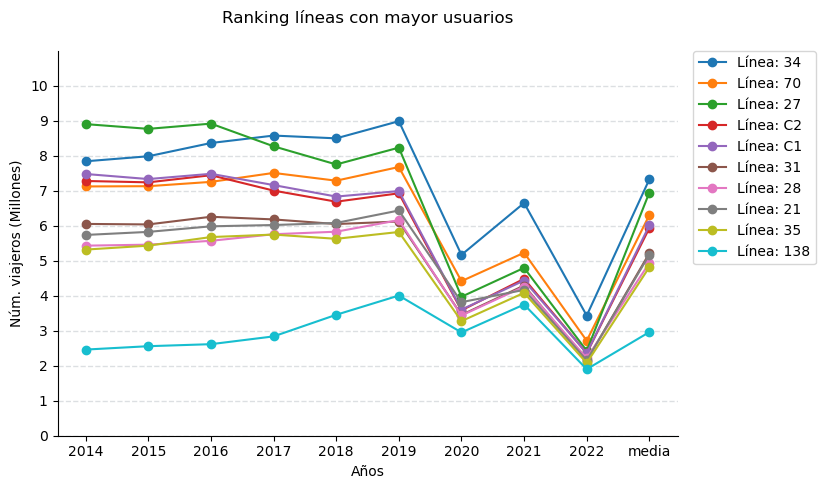

In [163]:
fig, axes = plt.subplots(figsize=(8, 5),dpi=100)

# Ocultar boordes del gráfico
axes.spines.right.set_visible(False)
axes.spines.top.set_visible(False)

# Visualización de los datos
years = numero_viajeros.columns[3:-1].values
axes.plot(years,numero_viajeros.sort_values(by='2021',ascending=False).iloc[0:10,3:-1].apply(lambda x: x/(10**6)).T.values,'-o',label='Línea: '+data['Etiqueta'])

# Rejilla
axes.grid(color="#172a3d", linestyle='--', linewidth=1, axis='y', alpha=0.15)

# Título y nombre de los ejes
axes.set_xlabel('Años')
axes.set_ylabel('Núm. viajeros (Millones)')
axes.set_title(label=f'Ranking líneas con mayor usuarios',pad=20)



# axes.set_xticks(range(0,len(years)))
# axes.set_xticklabels(years)

# Pasamos a decimal los datos (/10^6) para poder mostrarlos en formato decimal de millones 
y_max = round(max(numero_viajeros.sort_values(by='2021',ascending=False).iloc[:,3:-1].max().apply(lambda x: x/(10**6)).to_list()))
axes.set_ylim(0,y_max+2)
axes.set_yticks(range(0,y_max+2))

# Leyenda y fondo en blanco del gráfico
axes.legend(bbox_to_anchor=(1.025, 1), loc=2, borderaxespad=0)
fig.set_facecolor('white')
plt.show()
plt.close()